In [1]:
import os
import pandas as pd
import tempfile
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from kerasbeats import prep_time_series, NBeatsModel
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# from darts.models import NBEATSModel

# from darts import TimeSeries, concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, MaxPool1D, Flatten, Conv2D, MaxPooling2D
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.utils import to_categorical
# from sklearn.metrics import confusion_matrix
# from keras.layers import Bidirectional
# from keras import optimizers
# from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
# from keras.layers import Conv1D, MaxPooling1D, MaxPool1D, Flatten, Conv2D
# import pickle
from sklearn.metrics import fbeta_score
import tensorflow_model_optimization as tfmot
# import keras


In [2]:


# directory = './Data/tinyml_contest_data_training'

# data = {'Subject Number': [],
#         'Label': [],
#         'Index': [],
#         'Bin'  : []}

# df = pd.DataFrame(data)


# rows, cols = (30213, 1251)
# arr = [[0]*cols]*rows
# print('row: ' + str(len(arr)))
# print('col: ' + str(len(arr[0])))
        
        
# print(df)
# # iterate over files in
# # that directory

# filecnt = 0

# for filename in os.scandir(directory):
#     #if filename.is_file():
#         #print(filename.path.replace('DeepLearning_for_ImagingFlowCytometry/data/TinyMl/tinyml_contest_data_training', '', 1))
        
#     filevals = []
        
#     datav2 = pd.read_csv(filename, sep=" ", header=None)
    
#     datav2.columns = [filename]
#     #filevals.append(filename)    
#     for x in datav2[filename]:
#         filevals.append(x)
    
#     arr[filecnt] = filevals  
    
    
    
#     name = filename.path[36:]
#         #filenames[name] = {}
#     sub = name.split('-')[0]
#     lab = name[4:].split('-')[0]
#     ind = int(name.split('-')[2][:-4])
    
#     if lab in ["VT", "VFb"] :
#         bin = 1
#     else:
#         bin = 0
    
#     df2 = {'Subject Number': sub, 'Label': lab, 'Index': ind, 'Bin' : bin}
    
#     df = df.append(df2, ignore_index = True)
    
    
#     #for x in range(len(filevales)):
#      #   arr[filecnt][x] = filevals[x]
    
#     filecnt += 1
    
    
# import numpy

# newnumpy = numpy.array(arr)

# largedf = pd.DataFrame(newnumpy)


# alldf = pd.concat([df, largedf], axis = 1)

# alldf = alldf.sort_values(by=['Subject Number', 'Label', 'Index'], ignore_index = True)
# alldf = alldf.drop(columns=['Label', 'Index', 'Bin'])
# #print(filecnt)

# print(len(arr[0]))

# #print(alldf.head())

# onlylab = df.drop(columns=['Subject Number','Label', 'Index'])

# finaldf = pd.concat([alldf, onlylab], axis = 1)

# # print(finaldf.head())

In [3]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()

def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

for d in devices:
    t = d.device_type
    name = d.physical_device_desc
    l = [item.split(':',1) for item in name.split(", ")]
    name_attr = dict([x for x in l if len(x)==2])
    dev = name_attr.get('name', 'Unnamed device')
    print(f" {d.name} || {dev} || {t} || {sizeof_fmt(d.memory_limit)}")

 /device:CPU:0 || Unnamed device || CPU || 256.0 MiB
 /device:XLA_CPU:0 || Unnamed device || XLA_CPU || 16.0 GiB
 /device:XLA_GPU:0 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:XLA_GPU:1 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:XLA_GPU:2 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:XLA_GPU:3 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:GPU:0 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB
 /device:GPU:1 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB
 /device:GPU:2 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB
 /device:GPU:3 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB


2022-10-05 12:57:05.552747: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-10-05 12:57:05.589483: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3499710000 Hz
2022-10-05 12:57:05.590735: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e184792330 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-10-05 12:57:05.590785: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-10-05 12:57:05.595434: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-10-05 12:57:07.644708: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e184719190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-10-05 12:57:07.644753: I tensor

In [4]:
finaldf = pd.read_csv('dataloaded.csv')

In [5]:
finaldf

,Subject Number,0,1,2,3,4,5,6,7,8,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,Bin
0,S01,-0.001718,-0.095806,-0.164705,-0.189470,-0.105115,-0.007060,0.106121,0.127848,0.111724,...,0.030358,0.023003,-0.007709,-0.003488,0.014278,-0.017681,-0.020547,-0.001652,-0.030727,0.0
1,S01,0.016251,-0.008247,0.005012,-0.007177,-0.000700,-0.018108,0.017456,-0.013712,0.010719,...,-0.018446,0.001842,0.005302,0.011047,0.017912,0.021195,-0.001553,0.033582,0.024117,0.0
2,S01,-0.012153,-0.019460,0.010308,-0.011775,0.009485,0.017778,-0.014232,0.006212,0.010179,...,-0.002355,-0.001435,-0.008413,-0.011103,-0.013496,-0.003475,-0.006173,0.002482,-0.004514,0.0
3,S01,0.003189,0.009441,0.013109,0.004647,-0.006620,-0.004719,0.002988,-0.023382,0.007880,...,-0.002689,-0.004957,0.009094,0.013103,-0.012610,-0.020514,0.006492,-0.006451,-0.009719,0.0
4,S01,0.012738,0.012978,-0.013933,0.013002,-0.011752,0.007639,-0.013597,-0.000866,0.000694,...,0.013919,-0.007044,0.031403,0.012673,-0.003761,-0.013153,-0.012249,-0.015965,-0.004866,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30208,S95,-0.332482,-0.340718,-0.122615,0.085202,0.471829,0.630832,0.878892,0.443409,0.016916,...,-0.286388,0.065137,-0.055429,0.236196,0.063671,0.186460,0.218980,0.200417,0.070140,1.0
30209,S95,-0.209928,-0.204724,0.033302,-0.076489,0.087503,0.130825,-0.061206,0.190358,0.185017,...,0.884048,0.793466,0.572090,0.089591,-0.089960,-0.028005,-0.161846,0.027143,-0.189498,1.0
30210,S95,-0.100085,-0.513255,-0.519358,-0.172858,0.384442,0.373873,0.129929,0.052760,-0.153613,...,0.057048,0.086446,0.377366,0.204054,0.256200,0.083140,0.221371,0.191867,-0.575213,1.0
30211,S95,0.131366,0.106964,0.050252,0.196197,0.027283,0.046262,0.035980,0.093962,0.019785,...,0.168492,-0.126853,-0.022228,0.005178,-0.120576,-0.155777,-0.108943,-0.158428,0.006180,1.0


In [6]:

BATCH_SIZE = 32
GPUS = ["GPU:0","GPU:1", "GPU:2","GPU:3"]


strategy = tf.distribute.MirroredStrategy( GPUS )
print('Number of devices: %d' % strategy.num_replicas_in_sync) 

batch_size = BATCH_SIZE * strategy.num_replicas_in_sync


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Number of devices: 4


2022-10-05 12:57:13.502853: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 12:57:13.504225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 12:57:13.505535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:81:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 12:57:13.506808: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 3 with properties: 
pciBusID: 0000:82:00.0 n

In [7]:
finaldf.Bin.value_counts()

0.0    16253
1.0    13960
Name: Bin, dtype: int64

In [8]:
finaldf_new  = finaldf.drop(columns=['Subject Number'], axis =1)

In [9]:
finaldf_new

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,Bin
0,-0.001718,-0.095806,-0.164705,-0.189470,-0.105115,-0.007060,0.106121,0.127848,0.111724,0.061645,...,0.030358,0.023003,-0.007709,-0.003488,0.014278,-0.017681,-0.020547,-0.001652,-0.030727,0.0
1,0.016251,-0.008247,0.005012,-0.007177,-0.000700,-0.018108,0.017456,-0.013712,0.010719,0.010638,...,-0.018446,0.001842,0.005302,0.011047,0.017912,0.021195,-0.001553,0.033582,0.024117,0.0
2,-0.012153,-0.019460,0.010308,-0.011775,0.009485,0.017778,-0.014232,0.006212,0.010179,0.000313,...,-0.002355,-0.001435,-0.008413,-0.011103,-0.013496,-0.003475,-0.006173,0.002482,-0.004514,0.0
3,0.003189,0.009441,0.013109,0.004647,-0.006620,-0.004719,0.002988,-0.023382,0.007880,0.019491,...,-0.002689,-0.004957,0.009094,0.013103,-0.012610,-0.020514,0.006492,-0.006451,-0.009719,0.0
4,0.012738,0.012978,-0.013933,0.013002,-0.011752,0.007639,-0.013597,-0.000866,0.000694,0.000275,...,0.013919,-0.007044,0.031403,0.012673,-0.003761,-0.013153,-0.012249,-0.015965,-0.004866,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30208,-0.332482,-0.340718,-0.122615,0.085202,0.471829,0.630832,0.878892,0.443409,0.016916,-0.467942,...,-0.286388,0.065137,-0.055429,0.236196,0.063671,0.186460,0.218980,0.200417,0.070140,1.0
30209,-0.209928,-0.204724,0.033302,-0.076489,0.087503,0.130825,-0.061206,0.190358,0.185017,0.133373,...,0.884048,0.793466,0.572090,0.089591,-0.089960,-0.028005,-0.161846,0.027143,-0.189498,1.0
30210,-0.100085,-0.513255,-0.519358,-0.172858,0.384442,0.373873,0.129929,0.052760,-0.153613,0.025636,...,0.057048,0.086446,0.377366,0.204054,0.256200,0.083140,0.221371,0.191867,-0.575213,1.0
30211,0.131366,0.106964,0.050252,0.196197,0.027283,0.046262,0.035980,0.093962,0.019785,0.028760,...,0.168492,-0.126853,-0.022228,0.005178,-0.120576,-0.155777,-0.108943,-0.158428,0.006180,1.0


In [10]:
# finaldf_new.drop(columns=finaldf.columns[0], axis=1, inplace=True)

In [11]:
# finaldf_new

In [12]:
finaldf_new.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,Bin
27469,-0.041024,-0.013125,0.049922,-0.011931,0.053438,0.028411,0.034311,-0.009464,0.042860,-0.006467,...,0.051114,0.048917,0.009020,0.048289,0.071468,0.004350,0.057227,0.039280,0.035348,1.0
5909,-0.220509,-0.182258,0.016023,0.248153,0.471533,0.448524,0.254561,-0.054527,-0.269558,-0.286266,...,-0.270803,-0.171342,-0.018458,0.256281,0.429520,0.465940,0.288106,-0.014676,-0.238021,0.0
19000,0.009480,-0.012620,-0.011669,-0.022293,0.006587,-0.036144,-0.024323,-0.034141,0.012461,0.016105,...,0.043405,0.030073,0.058171,0.034721,0.045703,-0.028214,-0.127191,-0.150897,-0.138830,1.0
27525,0.020608,0.004776,-0.022134,-0.045532,0.023020,0.036966,0.012297,0.039079,0.034127,0.049028,...,-0.026291,-0.023200,-0.031467,-0.025794,-0.012974,-0.035785,-0.005544,-0.018050,-0.050258,1.0
22132,0.034689,0.002596,0.007126,0.010651,0.007212,-0.009776,-0.038176,0.025409,-0.006806,-0.013743,...,-0.032890,0.001110,0.000781,-0.017405,-0.042541,-0.036137,0.002497,-0.042646,-0.027276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,-0.018425,0.002972,0.009358,-0.010217,0.017751,-0.004796,0.006805,0.000639,0.003705,0.007677,...,0.008797,0.019930,-0.009983,-0.017530,-0.004952,-0.007826,0.011717,0.013215,-0.001294,0.0
17678,0.036423,0.026860,-0.071603,-0.041686,0.051341,-0.059904,-0.080849,0.033650,0.072626,-0.001253,...,0.023780,-0.003464,0.099841,0.227982,0.246207,0.248156,0.111668,-0.012278,-0.295910,0.0
22947,-0.025462,0.059353,-0.030178,-0.062067,0.029313,-0.011505,0.015281,0.007253,0.052388,0.088842,...,-0.139095,-0.154645,-0.086340,-0.065871,0.033561,-0.039874,0.103643,0.072381,0.087772,0.0
26941,0.055961,0.064000,-0.028014,0.065102,-0.032407,0.066778,0.039916,-0.061618,0.004314,-0.075639,...,-0.042388,-0.021716,-0.071878,0.108833,0.082641,0.061402,0.041585,0.039459,0.169186,0.0


In [13]:
X = finaldf_new.iloc[:,:-1].values

In [14]:
y = finaldf_new.iloc[:,1250].values

In [15]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [16]:
# X_train_n, X_rem, y_train, y_rem,= train_test_split(X, y, train_size = 0.8, random_state = 0)
# X_train, X_rem, y_train, y_rem,= train_test_split(X, y, train_size = 0.8, random_state = 0)
# X_train_n, X_test_n, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [17]:
# X_valid_n, X_test_n, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

In [18]:
# print(X_train_n.shape), print(y_train.shape)
# # print(X_valid.shape), print(y_valid.shape)
# print(X_test_n.shape), print(y_test.shape)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(24170, 1250)
(24170,)
(6043, 1250)
(6043,)


(None, None)

In [19]:
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [20]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)
# X_valid_n = scaler.transform(X_valid)

In [21]:
X_train_cnn = np.reshape(X_train_n, (X_train_n.shape[0], X_train_n.shape[1],1))
X_test_cnn = np.reshape(X_test_n, (X_test_n.shape[0], X_test_n.shape[1],1))
# X_valid_cnn = np.reshape(X_valid_n, (X_valid_n.shape[0], X_valid_n.shape[1],1))

In [22]:
# X_train_cnn.shape, X_test_cnn.shape, X_valid_cnn.shape 
X_train_cnn.shape, X_test_cnn.shape

((24170, 1250, 1), (6043, 1250, 1))

In [23]:
# n_timesteps, n_features = X_train_cnn.shape[1], X_train_cnn.shape[2]

In [24]:
# n_features

In [25]:
# n_timesteps

In [26]:
checkpoint_path = "./checkpoint_path/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [27]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [28]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('./checkpoint_path/training_1/model{epoch:08d}.h5',save_freq='epoch', period=10) 

In [29]:
# input_shape = np.shape(X_train_cnn)
# input_shape 

In [30]:
# input_shape=(X_train_n.shape[-1],)
# input_shape

In [31]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',input_shape = (1250,1)))
model.add(Conv1D(filters=16, kernel_size=4, activation='relu',input_shape = (1250,1)))
model.add(Conv1D(filters=8, kernel_size=5, activation='relu',input_shape = (1250,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

#########Best################

# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=5,strides=5, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=8, kernel_size=3,strides=3, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=4, kernel_size=5,strides=2, activation='relu',input_shape = (1250,1)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))

######tf_lite2#####

# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=5,strides=5, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=8, kernel_size=3,strides=3, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=4, kernel_size=2,strides=2, activation='relu',input_shape = (1250,1)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))


# import time
# start = time.time()
# with strategy.scope():
#     model = Sequential()
#     # adding the first convolutionial layer with 24 filters and 2 by 1 kernal size, using the rectifier as the activation function
#     model.add(Conv2D(24, (16,1),input_shape=(24170, 1250, 1),activation='relu'))
#     # adding a maxpooling layer
#     model.add(MaxPooling2D(pool_size=(2,1),strides=(2,1),padding='valid'))
#     # flattening the output in order to apply the fully connected layer
#     model.add(Flatten())
#     # adding first fully connected layer with 12 units
#     model.add(Dense(12, activation='relu')) 
#     # adding the dropout layer to avoid overfitting
#     model.add(Dropout(0.3))
#     # adding softmax layer for the classification
#     model.add(Dense(1, activation='sigmoid'))
#     # Compiling the model to generate a model

#     adam = optimizers.Adam(lr = 0.0001, decay=1e-6)

#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
# elapsed = time.time()-start
# print (f'Training time: {hms_string(elapsed)}')


In [32]:
# model = Sequential()
# model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(1250,1)))
# # model.add(layers.MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(len(np.unique(y_train))))

In [33]:
# model = Sequential()
# model.add(Conv1D(filters=128, kernel_size=5, activation='relu',input_shape = (1250,1)))
# model.add(MaxPooling1D(pool_size=2))
# # model.add(LSTM(32))
# model.add(Dropout(0.25))
# model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1248, 32)          128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1245, 16)          2064      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1241, 8)           648       
_________________________________________________________________
dropout (Dropout)            (None, 1241, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9928)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9929      
Total params: 12,769
Trainable params: 12,769
Non-trainable params: 0
____________________________________________________

In [35]:
# adam = optimizers.SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True) 
# adam = optimizers.Adam(lr = 0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# model.fit(X_train_cnn, y_train, validation_data = (X_valid_cnn, y_valid),epochs=epochs, batch_size=batch_size, verbose=verbose)
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


2022-10-05 12:57:22.943782: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-10-05 12:57:23.092724: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


756/756 [==============================] - 3s 4ms/step - loss: 0.4691 - accuracy: 0.7812
Epoch 2/20
756/756 [==============================] - 3s 4ms/step - loss: 0.3410 - accuracy: 0.8592
Epoch 3/20
756/756 [==============================] - 3s 4ms/step - loss: 0.2844 - accuracy: 0.8886
Epoch 4/20
756/756 [==============================] - 3s 4ms/step - loss: 0.2371 - accuracy: 0.9106
Epoch 5/20
756/756 [==============================] - 3s 4ms/step - loss: 0.2070 - accuracy: 0.9217
Epoch 6/20
756/756 [==============================] - 3s 4ms/step - loss: 0.1806 - accuracy: 0.9317
Epoch 7/20
756/756 [==============================] - 3s 4ms/step - loss: 0.1625 - accuracy: 0.9388
Epoch 8/20
756/756 [==============================] - 3s 4ms/step - loss: 0.1437 - accuracy: 0.9460
Epoch 9/20
756/756 [==============================] - 3s 4ms/step - loss: 0.1327 - accuracy: 0.9507
Epoch 10/20
756/756 [==============================] - 3s 4ms/step - loss: 0.1215 - accuracy: 0.9551
Epoch 11/2

In [233]:

# tf.saved_model.save(model, "/data/space1/BooleanLab/TinyML/saved-model_5" )


In [234]:
# pickle.dump(model, open('./checkpoint_path/training_1/best_model_2.pkl', 'wb'))

In [235]:
# model.save("./checkpoint_path/training_1/best_model_2.h5")

In [37]:

y_pred = model.predict(X_test_cnn)

In [38]:
y_pred

array([[0.8440431 ],
       [0.8025839 ],
       [0.9999839 ],
       ...,
       [1.        ],
       [1.        ],
       [0.99999547]], dtype=float32)

In [39]:
y_pred_class = model.predict_classes(X_test_cnn)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [40]:
y_pred_class

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [41]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)

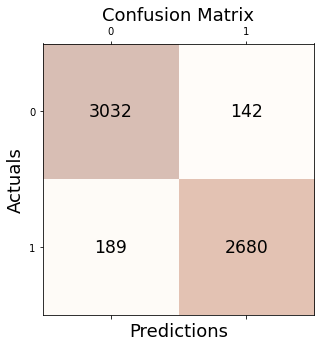

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
p = precision_score(y_test, y_pred_class)
p

0.9496810772501771

In [44]:
	
print('Precision: %.3f' % precision_score(y_test, y_pred_class))

Precision: 0.950


In [45]:
	
print('Recall: %.3f' % recall_score(y_test, y_pred_class))

Recall: 0.934


In [46]:
r = recall_score(y_test, y_pred_class)
r

0.9341233879400488

In [47]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_class))

Accuracy: 0.945


In [48]:
	
print('F1 Score: %.3f' % f1_score(y_test, y_pred_class))

F1 Score: 0.942


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[3032,  142],
       [ 189, 2680]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_class)

0.945225881184842

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      3174
         1.0       0.95      0.93      0.94      2869

    accuracy                           0.95      6043
   macro avg       0.95      0.94      0.95      6043
weighted avg       0.95      0.95      0.95      6043



In [52]:
fbeta_score(y_test, y_pred_class, average=None, beta=2)

array([0.95244079, 0.93719401])

In [53]:
beta = 2

In [54]:
f_beta = (1+beta**2) * (p * r) / ((beta**2)*p + r)

In [55]:
f_beta

0.9371940131486923

In [56]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

In [57]:
# X_train_cnn.shape[0]

In [59]:
num_train_data = X_train_cnn.shape[0] 
end_step = np.ceil(num_train_data / 32).astype(np.int32) * 20

In [60]:
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

In [61]:
model_for_pruning = prune_low_magnitude(model, **pruning_params)

Instructions for updating:
Please use `layer.add_weight` method instead.


In [62]:

model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv1d ( (None, 1248, 32)          226       
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 1245, 16)          4114      
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 1241, 8)           1290      
_________________________________________________________________
prune_low_magnitude_dropout  (None, 1241, 8)           1         
_________________________________________________________________
prune_low_magnitude_flatten  (None, 9928)              1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 1)                 19859     
Total params: 25,491
Trainable params: 12,769
Non-trainable params: 12,722
_______________________________________________

In [63]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1, callbacks=callbacks)



2022-10-05 12:59:18.634168: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-10-05 12:59:18.634275: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1363] Profiler found 4 GPUs
2022-10-05 12:59:18.637232: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcupti.so.10.1
2022-10-05 12:59:18.737862: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-10-05 12:59:18.739881: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-10-05 12:59:18.740831: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, C

Epoch 1/20
 27/756 [>.............................] - ETA: 4s - loss: 0.5497 - accuracy: 0.9757

2022-10-05 12:59:20.812116: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-10-05 12:59:20.812246: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-10-05 12:59:20.813533: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-10-05 12:59:20.821960: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, CUPTI_CB_DOMAIN_DRIVER_API, cbid)failed with error CUPTI_ERROR_INVALID_PARAMETER
2022-10-05 12:59:20.822335: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:216]  GpuTracer has collected 0 callback api events and 0 activity events.
2022-10-05 12:59:20.826480: I ten

756/756 [==============================] - 5s 6ms/step - loss: 0.5589 - accuracy: 0.9178
Epoch 2/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5442 - accuracy: 0.9508
Epoch 3/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5417 - accuracy: 0.9570
Epoch 4/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5426 - accuracy: 0.9558
Epoch 5/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5440 - accuracy: 0.9515
Epoch 6/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5441 - accuracy: 0.9516
Epoch 7/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5444 - accuracy: 0.9519
Epoch 8/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5446 - accuracy: 0.9515
Epoch 9/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5506 - accuracy: 0.9357
Epoch 10/20
756/756 [==============================] - 5s 6ms/step - loss: 0.5472 - accuracy: 0.9439
Epoch 11/2

In [64]:
y_pred = model_for_pruning.predict(X_test_cnn)

In [65]:
y_pred

array([[0.97988623],
       [0.54000074],
       [0.9999932 ],
       ...,
       [1.        ],
       [1.        ],
       [0.98719275]], dtype=float32)

In [66]:
y_pred_class = model_for_pruning.predict_classes(X_test_cnn)

In [67]:
y_pred_class

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [68]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)

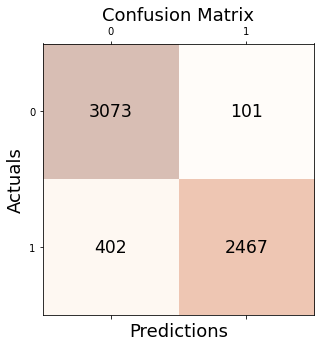

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [70]:
p = precision_score(y_test, y_pred_class)
p

0.9606697819314641

In [80]:
	
print('Precision: %.3f' % precision_score(y_test, y_pred_class))

Precision: 0.961


In [81]:
print('Recall: %.3f' % recall_score(y_test, y_pred_class))

Recall: 0.860


In [82]:
r = recall_score(y_test, y_pred_class)
r

0.8598814918089926

In [83]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_class))

Accuracy: 0.917


In [84]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_class))

F1 Score: 0.907


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[3073,  101],
       [ 402, 2467]])

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_class)

0.9167631970875393

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      3174
         1.0       0.96      0.86      0.91      2869

    accuracy                           0.92      6043
   macro avg       0.92      0.91      0.92      6043
weighted avg       0.92      0.92      0.92      6043



In [88]:
fbeta_score(y_test, y_pred_class, average=None, beta=2)

array([0.95015769, 0.87831102])

In [89]:
# tf.saved_model.save(model_for_pruning, "/data/space1/BooleanLab/TinyML/saved-model_prune" )

In [90]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model)

# _, pruned_keras_file = tempfile.mkstemp('.h5')
# _, pruned_keras_file = "/data/space1/BooleanLab/TinyML/test_prune.h5"
# tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
# tf.keras.models.save_model(model_for_export, "/data/space1/BooleanLab/TinyML/test_prune", include_optimizer=False)
# print('Saved pruned Keras model to:', pruned_keras_file)

In [91]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

2022-10-05 13:04:18.709131: I tensorflow/core/grappler/devices.cc:55] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 4
2022-10-05 13:04:18.709321: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-10-05 13:04:18.712353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 13:04:18.713436: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 13:04:18.714467: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:81:00.0 name: GeForce GTX 1080 Ti computeCapa

Saved pruned TFLite model to: /tmp/tmpw0kgjcyf.tflite


In [92]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [93]:
# print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
# print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

Size of gzipped pruned TFlite model: 17180.00 bytes


In [95]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

# with open("/data/space1/BooleanLab/TinyML/final2.tflite", 'wb') as f:
#   f.write(quantized_and_pruned_tflite_model)

# print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

# # print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

2022-10-05 13:05:41.682306: I tensorflow/core/grappler/devices.cc:55] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 4
2022-10-05 13:05:41.682448: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-10-05 13:05:41.683627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 13:05:41.684642: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 13:05:41.685615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:81:00.0 name: GeForce GTX 1080 Ti computeCapa

Size of gzipped pruned and quantized TFlite model: 144.00 bytes
